<a href="https://colab.research.google.com/github/PhamMinhThuan/daily-knowledge/blob/main/DA01_Thuan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Data Exploration

In [355]:
import numpy as np
import pandas as pd

In [356]:
dataset = pd.read_csv('https://raw.githubusercontent.com/maxtran1997gmail/Files/main/loan_train.csv')


In [357]:
dataset

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
...,...,...,...,...,...,...,...,...,...,...
341,394,394,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,395,395,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,397,397,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,398,398,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male


In [358]:
dataset = dataset.iloc[:,2:]

In [359]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   loan_status     346 non-null    object
 1   Principal       346 non-null    int64 
 2   terms           346 non-null    int64 
 3   effective_date  346 non-null    object
 4   due_date        346 non-null    object
 5   age             346 non-null    int64 
 6   education       346 non-null    object
 7   Gender          346 non-null    object
dtypes: int64(3), object(5)
memory usage: 21.8+ KB


In [360]:
dataset.isna().sum()

loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64

In [361]:
dataset['effective_date'] = pd.to_datetime(dataset['effective_date'], unit='ns')
dataset['due_date'] = pd.to_datetime(dataset['due_date'], unit='ns')



In [362]:
dataset['effective_days'] = (dataset['due_date'] - dataset['effective_date']).dt.days
dataset['effective_days'] 

0      29
1      29
2      14
3      29
4      29
       ..
341    14
342    29
343    14
344    59
345    29
Name: effective_days, Length: 346, dtype: int64

In [363]:
dataset.reset_index(drop = True, inplace = True)

2. Data Standardization

In [364]:
dataset['principal_nomalized'] = dataset['Principal']/dataset['Principal'].max()
dataset['terms_nomalized'] = dataset['terms']/dataset['terms'].max()
dataset['age_nomalized'] = dataset['age']/dataset['age'].max()
dataset['days_nomalized'] = dataset['effective_days']/dataset['effective_days'].max()

In [365]:
dataset.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,effective_days,principal_nomalized,terms_nomalized,age_nomalized,days_nomalized
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,29,1.0,1.0,0.882353,0.491525
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,29,1.0,1.0,0.647059,0.491525
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,14,1.0,0.5,0.529412,0.237288
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,29,1.0,1.0,0.549020,0.491525
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,29,1.0,1.0,0.568627,0.491525


In [366]:
label = ['loan_status', 'education',	'Gender', 'principal_nomalized', 'terms_nomalized', 'age_nomalized', 'days_nomalized']
dataset = dataset[label]

3. Data Visualization


Examine correlation between independent and dependent variable
Only consider those variables with high correlation

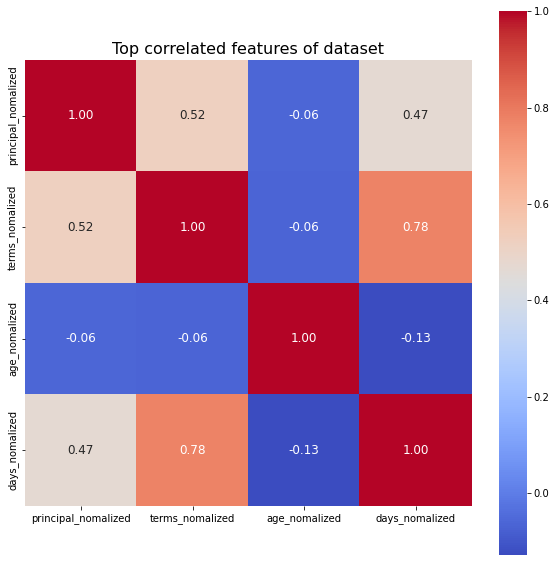

In [367]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = dataset.corr()
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, square=True, ax=ax, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size':12})
plt.title('Top correlated features of dataset', size=16)
plt.show()

Labeling Categories with Dummy variables

In [368]:
arr = ['education',	'Gender']
for i in range(len(arr)):
  dummy_variable_1 = pd.get_dummies(dataset[arr[i]])
  dataset = pd.concat([dataset, dummy_variable_1], axis = 1)

In [369]:
from sklearn.preprocessing import LabelEncoder

In [392]:
dataset[['loan_status']] = dataset[['loan_status']].apply(LabelEncoder().fit_transform)

4. Model development

In [371]:
label = ['loan_status', 'principal_nomalized',
       'terms_nomalized', 'age_nomalized', 'days_nomalized', 'Bechalor',
       'High School or Below', 'Master or Above', 'college', 'female', 'male']
dataset = dataset[label]

In [372]:
from sklearn.model_selection import train_test_split


In [373]:
X = dataset.drop(['loan_status'], axis = 1)
y = dataset['loan_status']

In [374]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0, shuffle = True)

In [375]:
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, mean_absolute_error, precision_score, recall_score
from sklearn.metrics import classification_report

*a. LogisticRegression*

In [376]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [377]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
            'max_iter': [1000, 2000, 3000, 4000, 5000], 
            'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga']} 
 
  
grid1 = GridSearchCV(LogisticRegression(), param_grid, refit = True, cv=2, verbose = 3) 


In [378]:
# fitting the model for grid search 
grid1.fit(X_train, y_train) 
 

Fitting 2 folds for each of 125 candidates, totalling 250 fits
[CV 1/2] END C=0.1, max_iter=1000, solver=lbfgs;, score=0.719 total time=   0.0s
[CV 2/2] END C=0.1, max_iter=1000, solver=lbfgs;, score=0.711 total time=   0.0s
[CV 1/2] END C=0.1, max_iter=1000, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 2/2] END C=0.1, max_iter=1000, solver=newton-cg;, score=0.711 total time=   0.0s
[CV 1/2] END C=0.1, max_iter=1000, solver=liblinear;, score=0.719 total time=   0.0s
[CV 2/2] END C=0.1, max_iter=1000, solver=liblinear;, score=0.711 total time=   0.0s
[CV 1/2] END ..C=0.1, max_iter=1000, solver=sag;, score=0.719 total time=   0.0s
[CV 2/2] END ..C=0.1, max_iter=1000, solver=sag;, score=0.711 total time=   0.0s
[CV 1/2] END .C=0.1, max_iter=1000, solver=saga;, score=0.719 total time=   0.0s
[CV 2/2] END .C=0.1, max_iter=1000, solver=saga;, score=0.711 total time=   0.0s
[CV 1/2] END C=0.1, max_iter=2000, solver=lbfgs;, score=0.719 total time=   0.0s
[CV 2/2] END C=0.1, max_iter=2

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/2] END ..C=100, max_iter=2000, solver=sag;, score=0.694 total time=   0.0s
[CV 1/2] END .C=100, max_iter=2000, solver=saga;, score=0.719 total time=   0.0s
[CV 2/2] END .C=100, max_iter=2000, solver=saga;, score=0.694 total time=   0.0s
[CV 1/2] END C=100, max_iter=3000, solver=lbfgs;, score=0.719 total time=   0.0s
[CV 2/2] END C=100, max_iter=3000, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 1/2] END C=100, max_iter=3000, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 2/2] END C=100, max_iter=3000, solver=newton-cg;, score=0.694 total time=   0.0s
[CV 1/2] END C=100, max_iter=3000, solver=liblinear;, score=0.719 total time=   0.0s
[CV 2/2] END C=100, max_iter=3000, solver=liblinear;, score=0.694 total time=   0.0s
[CV 1/2] END ..C=100, max_iter=3000, solver=sag;, score=0.719 total time=   0.0s
[CV 2/2] END ..C=100, max_iter=3000, solver=sag;, score=0.694 total time=   0.0s
[CV 1/2] END .C=100, max_iter=3000, solver=saga;, score=0.719 total time=   0.0s
[CV 2/2] END

GridSearchCV(cv=2, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'max_iter': [1000, 2000, 3000, 4000, 5000],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga']},
             verbose=3)

In [379]:
print(grid1.best_params_)

{'C': 0.1, 'max_iter': 1000, 'solver': 'lbfgs'}


In [380]:
lr_predict = grid1.predict(X_test)
accuracy = accuracy_score(y_test, lr_predict)
mse = mean_squared_error(y_test, lr_predict)
mae = mean_absolute_error(y_test, lr_predict)
predcision = precision_score(y_test, lr_predict)
recall = recall_score(y_test, lr_predict)
print("accurry =", accuracy)
print("mse =", mse)
print("mae =", mae)
print("predcision =", predcision)
print("recall =", recall)

accurry = 0.8365384615384616
mse = 0.16346153846153846
mae = 0.16346153846153846
predcision = 0.8365384615384616
recall = 1.0


Model có accurry score là 83.65%

b. DecisionTreeClassifier

In [381]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [382]:
param_grid = {'max_depth': [2, 4, 6, 8, 10], 
            'min_samples_split': [2, 4, 6, 8, 10],
            'min_samples_leaf': [1, 2, 3, 4, 5],
            'max_features': [1, 3, 5],
            'criterion': ['gini', 'entropy']} 
 
  
grid2 = GridSearchCV(DecisionTreeClassifier(), param_grid, refit = True, cv=2, verbose = 3) 

In [383]:
# fitting the model for grid search 
grid2.fit(X_train, y_train)

Fitting 2 folds for each of 750 candidates, totalling 1500 fits
[CV 1/2] END criterion=gini, max_depth=2, max_features=1, min_samples_leaf=1, min_samples_split=2;, score=0.719 total time=   0.0s
[CV 2/2] END criterion=gini, max_depth=2, max_features=1, min_samples_leaf=1, min_samples_split=2;, score=0.694 total time=   0.0s
[CV 1/2] END criterion=gini, max_depth=2, max_features=1, min_samples_leaf=1, min_samples_split=4;, score=0.719 total time=   0.0s
[CV 2/2] END criterion=gini, max_depth=2, max_features=1, min_samples_leaf=1, min_samples_split=4;, score=0.711 total time=   0.0s
[CV 1/2] END criterion=gini, max_depth=2, max_features=1, min_samples_leaf=1, min_samples_split=6;, score=0.719 total time=   0.0s
[CV 2/2] END criterion=gini, max_depth=2, max_features=1, min_samples_leaf=1, min_samples_split=6;, score=0.694 total time=   0.0s
[CV 1/2] END criterion=gini, max_depth=2, max_features=1, min_samples_leaf=1, min_samples_split=8;, score=0.719 total time=   0.0s
[CV 2/2] END criter

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'max_features': [1, 3, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             verbose=3)

In [384]:
print(grid2.best_params_)


{'criterion': 'entropy', 'max_depth': 4, 'max_features': 1, 'min_samples_leaf': 3, 'min_samples_split': 4}


In [385]:
dt_predict = grid2.predict(X_test)
accuracy = accuracy_score(y_test, dt_predict)
mse = mean_squared_error(y_test, dt_predict)
mae = mean_absolute_error(y_test, dt_predict)
predcision = precision_score(y_test, dt_predict)
recall = recall_score(y_test, dt_predict)

print("mse =", mse)
print("mae =", mae)
print("accurry =", accuracy)
print("predcision =", predcision)
print("recall =", recall)

mse = 0.17307692307692307
mae = 0.17307692307692307
accurry = 0.8269230769230769
predcision = 0.8349514563106796
recall = 0.9885057471264368


Model có accurry score là 82.69%

c. RandomForestClassifier

In [386]:
from sklearn.ensemble import RandomForestClassifier


In [387]:
param_grid = {'max_depth': [2, 4, 6], 
            'min_samples_split': [2, 4, 6],
            'min_samples_leaf': [1, 2, 3, 4],
            'max_features': [1, 3, 5],
            'criterion': ['gini', 'entropy'],
            'n_estimators': [100, 200]} 
 
  
grid3 = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, cv=2, verbose = 3) 

In [388]:
# fitting the model for grid search 
grid3.fit(X_train, y_train)

Fitting 2 folds for each of 432 candidates, totalling 864 fits
[CV 1/2] END criterion=gini, max_depth=2, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.719 total time=   0.2s
[CV 2/2] END criterion=gini, max_depth=2, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.711 total time=   0.2s
[CV 1/2] END criterion=gini, max_depth=2, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.719 total time=   0.3s
[CV 2/2] END criterion=gini, max_depth=2, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.711 total time=   0.3s
[CV 1/2] END criterion=gini, max_depth=2, max_features=1, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=0.719 total time=   0.2s
[CV 2/2] END criterion=gini, max_depth=2, max_features=1, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=0.711 total time=   0.2s
[CV 1/2] END criterion=gini, max_depth=2, m

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6], 'max_features': [1, 3, 5],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 200]},
             verbose=3)

In [389]:
print(grid3.best_params_)

{'criterion': 'gini', 'max_depth': 2, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [390]:
rf_predict = grid3.predict(X_test)
accuracy = accuracy_score(y_test, rf_predict)
mse = mean_squared_error(y_test, rf_predict)
mae = mean_absolute_error(y_test, rf_predict)
predcision = precision_score(y_test, rf_predict)
recall = recall_score(y_test, rf_predict)

print("mse =", mse)
print("mae =", mae)
print("accurry =", accuracy)
print("predcision =", predcision)
print("recall =", recall)

mse = 0.16346153846153846
mae = 0.16346153846153846
accurry = 0.8365384615384616
predcision = 0.8365384615384616
recall = 1.0


Model có accuracy score là 83.65%

LogisticRegression có accuracy score bằng với RandomForestClassifier (83.65%)
lớn hơn DecisionTreeClassifier (82.69%) 0.96%. Ta có thể sử dụng model có accurary score cao hơn.